In [4]:
import pandas as pd
df=pd.read_csv('emoji-sentiment.csv')
df

,Char,Image [twemoji],Unicode codepoint,Occurrences [5...max],Position [0...1],Neg [0...1],Neut [0...1],Pos [0...1],Sentiment bar (c.i. 95%),Unicode name,Unicode block
0,😂,😂,0x1f602,14622,0.805,0.247,0.285,0.468,NaN,FACE WITH TEARS OF JOY,Emoticons
1,❤,❤,0x2764,8050,0.747,0.044,0.166,0.790,NaN,HEAVY BLACK HEART,Dingbats
2,♥,♥,0x2665,7144,0.754,0.035,0.272,0.693,NaN,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,😍,0x1f60d,6359,0.765,0.052,0.219,0.729,NaN,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,😭,0x1f62d,5526,0.803,0.436,0.220,0.343,NaN,LOUDLY CRYING FACE,Emoticons
...,...,...,...,...,...,...,...,...,...,...,...
746,♮,♮,0x266e,5,0.937,0.125,0.625,0.250,NaN,MUSIC NATURAL SIGN,Miscellaneous Symbols
747,🅾,🅾,0x1f17e,5,0.977,0.375,0.375,0.250,NaN,NEGATIVE SQUARED LATIN CAPITAL LETTER O,Enclosed Alphanumeric Supplement
748,🔄,🔄,0x1f504,5,0.971,0.125,0.750,0.125,NaN,ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCL...,Miscellaneous Symbols and Pictographs
749,☄,☄,0x2604,5,0.435,0.125,0.750,0.125,NaN,COMET,Miscellaneous Symbols


In [ ]:
#Removing unnecessary columns that are not useful for analysis.

In [7]:
df = df[
    [
        "Char",
        "Occurrences [5...max]",
        "Position [0...1]",
        "Neg [0...1]",
        "Neut [0...1]",
        "Pos [0...1]"
    ]
]

In [8]:
df

,Char,Occurrences [5...max],Position [0...1],Neg [0...1],Neut [0...1],Pos [0...1]
0,😂,14622,0.805,0.247,0.285,0.468
1,❤,8050,0.747,0.044,0.166,0.790
2,♥,7144,0.754,0.035,0.272,0.693
3,😍,6359,0.765,0.052,0.219,0.729
4,😭,5526,0.803,0.436,0.220,0.343
...,...,...,...,...,...,...
746,♮,5,0.937,0.125,0.625,0.250
747,🅾,5,0.977,0.375,0.375,0.250
748,🔄,5,0.971,0.125,0.750,0.125
749,☄,5,0.435,0.125,0.750,0.125


In [ ]:
#Rename the remaining columns using snake_case (all lowercase letters with underscores between words).

In [11]:
df = df.rename(columns={
    "Char": "emoji",
    "Occurrences [5...max]": "total_mentions",
    "Position [0...1]": "emoji_position",
    "Neg [0...1]": "negative_percent",
    "Neut [0...1]": "neutral_percent",
    "Pos [0...1]": "positive_percent"
})
df

,emoji,total_mentions,emoji_position,negative_percent,neutral_percent,positive_percent
0,😂,14622,0.805,0.247,0.285,0.468
1,❤,8050,0.747,0.044,0.166,0.790
2,♥,7144,0.754,0.035,0.272,0.693
3,😍,6359,0.765,0.052,0.219,0.729
4,😭,5526,0.803,0.436,0.220,0.343
...,...,...,...,...,...,...
746,♮,5,0.937,0.125,0.625,0.250
747,🅾,5,0.977,0.375,0.375,0.250
748,🔄,5,0.971,0.125,0.750,0.125
749,☄,5,0.435,0.125,0.750,0.125


In [12]:
#Add a new column called sentiment, where sentiment = (% positive tweets) - (% negative tweets).

In [14]:
df["sentiment"] = df["positive_percent"] - df["negative_percent"]
df

,emoji,total_mentions,emoji_position,negative_percent,neutral_percent,positive_percent,sentiment
0,😂,14622,0.805,0.247,0.285,0.468,0.221
1,❤,8050,0.747,0.044,0.166,0.790,0.746
2,♥,7144,0.754,0.035,0.272,0.693,0.658
3,😍,6359,0.765,0.052,0.219,0.729,0.677
4,😭,5526,0.803,0.436,0.220,0.343,-0.093
...,...,...,...,...,...,...,...
746,♮,5,0.937,0.125,0.625,0.250,0.125
747,🅾,5,0.977,0.375,0.375,0.250,-0.125
748,🔄,5,0.971,0.125,0.750,0.125,0.000
749,☄,5,0.435,0.125,0.750,0.125,0.000


In [ ]:
#Add a positive_flag column that is True if sentiment > 0 (or above a set threshold), otherwise False.

In [16]:
df["positive_flag"] = df["sentiment"] > 0
df

,emoji,total_mentions,emoji_position,negative_percent,neutral_percent,positive_percent,sentiment,positive_flag
0,😂,14622,0.805,0.247,0.285,0.468,0.221,True
1,❤,8050,0.747,0.044,0.166,0.790,0.746,True
2,♥,7144,0.754,0.035,0.272,0.693,0.658,True
3,😍,6359,0.765,0.052,0.219,0.729,0.677,True
4,😭,5526,0.803,0.436,0.220,0.343,-0.093,False
...,...,...,...,...,...,...,...,...
746,♮,5,0.937,0.125,0.625,0.250,0.125,True
747,🅾,5,0.977,0.375,0.375,0.250,-0.125,False
748,🔄,5,0.971,0.125,0.750,0.125,0.000,False
749,☄,5,0.435,0.125,0.750,0.125,0.000,False


In [17]:
#What percentage of emojis in the dataset have a positive sentiment?

In [18]:
positive_percentage = (df["positive_flag"].sum() / len(df)) * 100
positive_percentage

np.float64(82.42343541944075)

In [ ]:
#What percentage of the top 20 most popular emojis are positive?

In [19]:
top_20 = df.sort_values(by="total_mentions", ascending=False).head(20)

top_20_positive_percentage = (
    top_20["positive_flag"].sum() / len(top_20)
) * 100

top_20_positive_percentage

np.float64(90.0)

In [ ]:
#Which emoji (with more than 500 mentions) is the most positive?

In [36]:
most_positive = (
    df[df["total_mentions"] > 500]
    .sort_values(by="sentiment", ascending=False)
    .head(5)
)

most_positive[["emoji", "sentiment", "total_mentions"]]

,emoji,sentiment,total_mentions
1,❤,0.746,8050
49,💞,0.739,687
29,🎉,0.738,1125
24,💃,0.734,1344
34,💙,0.730,912


In [22]:
#Which emoji (with more than 500 mentions) is the most negative?

In [24]:
most_negative = (
    df[df["total_mentions"] > 500]
    .sort_values(by="sentiment")
    .head(5)
)

most_negative[["emoji", "sentiment", "total_mentions"]]

,emoji,sentiment,total_mentions
23,😒,-0.374,1385
14,😩,-0.368,1808
53,🔫,-0.195,604
41,😡,-0.172,756
27,😔,-0.146,1205


In [25]:
#Where in the tweets are most emojis located (i.e. at the beginning or the end)?

In [26]:
df["emoji_location"] = df["emoji_position"].apply(
    lambda x: "end" if x > 0.5 else "beginning"
)

df["emoji_location"].value_counts(normalize=True) * 100

emoji_location
end          85.086551
beginning    14.913449
Name: proportion, dtype: float64

In [ ]:
#Is there a difference in the placement of positive versus negative emojis within a tweet?

In [27]:
placement_comparison = (
    df.groupby(["positive_flag", "emoji_location"])
    .size()
    .unstack()
)

placement_comparison

emoji_location,beginning,end
positive_flag,,
False,29,103
True,83,536


In [28]:
placement_percentage = (
    placement_comparison.div(
        placement_comparison.sum(axis=1), axis=0
    ) * 100
)

placement_percentage

emoji_location,beginning,end
positive_flag,,
False,21.969697,78.030303
True,13.408724,86.591276


In [33]:
df.head(100)

,emoji,total_mentions,emoji_position,negative_percent,neutral_percent,positive_percent,sentiment,positive_flag,emoji_location
0,😂,14622,0.805,0.247,0.285,0.468,0.221,True,end
1,❤,8050,0.747,0.044,0.166,0.790,0.746,True,end
2,♥,7144,0.754,0.035,0.272,0.693,0.658,True,end
3,😍,6359,0.765,0.052,0.219,0.729,0.677,True,end
4,😭,5526,0.803,0.436,0.220,0.343,-0.093,False,end
...,...,...,...,...,...,...,...,...,...
95,🍃,291,0.572,0.102,0.418,0.480,0.378,True,end
96,🎁,288,0.709,0.041,0.158,0.801,0.760,True,end
97,😠,288,0.849,0.564,0.172,0.265,-0.299,False,end
98,🐧,284,0.540,0.042,0.460,0.498,0.456,True,end


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("emoji-sentiment.csv")

# Rename columns
df = df.rename(columns={
    "Char": "emoji",
    "Occurrences [5...max]": "total_mentions",
    "Position [0...1]": "emoji_position",
    "Neg [0...1]": "negative_percent",
    "Neut [0...1]": "neutral_percent",
    "Pos [0...1]": "positive_percent"
})

# Feature engineering
df["sentiment"] = df["positive_percent"] - df["negative_percent"]
df["positive_flag"] = df["sentiment"] > 0
df["emoji_location"] = df["emoji_position"].apply(
    lambda x: "end" if x > 0.5 else "beginning"
)
df.head()

,emoji,Image [twemoji],Unicode codepoint,total_mentions,emoji_position,negative_percent,neutral_percent,positive_percent,Sentiment bar (c.i. 95%),Unicode name,Unicode block,sentiment,positive_flag,emoji_location
0,😂,😂,0x1f602,14622,0.805,0.247,0.285,0.468,NaN,FACE WITH TEARS OF JOY,Emoticons,0.221,True,end
1,❤,❤,0x2764,8050,0.747,0.044,0.166,0.790,NaN,HEAVY BLACK HEART,Dingbats,0.746,True,end
2,♥,♥,0x2665,7144,0.754,0.035,0.272,0.693,NaN,BLACK HEART SUIT,Miscellaneous Symbols,0.658,True,end
3,😍,😍,0x1f60d,6359,0.765,0.052,0.219,0.729,NaN,SMILING FACE WITH HEART-SHAPED EYES,Emoticons,0.677,True,end
4,😭,😭,0x1f62d,5526,0.803,0.436,0.220,0.343,NaN,LOUDLY CRYING FACE,Emoticons,-0.093,False,end


In [ ]:
#📊 1️⃣ Distribution of Emoji Sentiment Scores (Histogram)

#Interpretation:

#The histogram shows that most emojis have sentiment scores greater than zero,
#indicating a strong dominance of positive emotions in emoji usage. Very few emojis exhibit highly negative sentiment, 
#suggesting that emojis are generally used to express positive feelings on social media.

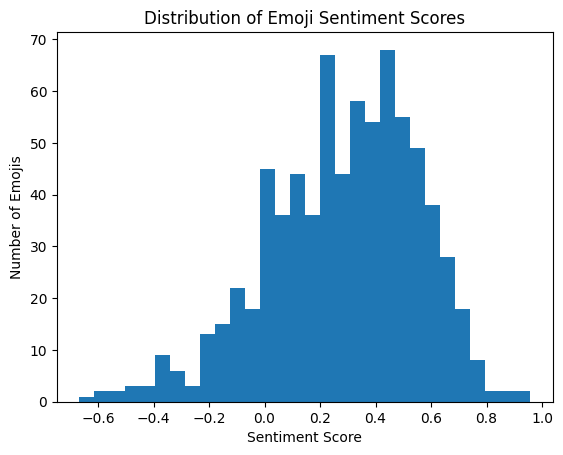

In [40]:
plt.figure()
plt.hist(df["sentiment"], bins=30)
plt.title("Distribution of Emoji Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Emojis")
plt.show()

In [ ]:
#📊 2️⃣ Positive vs Negative Emojis (Bar Chart)

#Interpretation:

#The bar chart illustrates that the number of emojis classified as positive is significantly 
#higher than those classified as negative. This indicates that emojis are predominantly 
#used to convey positive emotions in online communication.

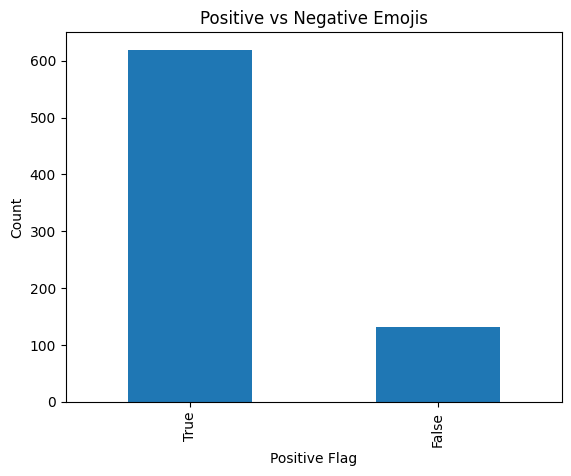

In [41]:
plt.figure()
df["positive_flag"].value_counts().plot(kind="bar")
plt.title("Positive vs Negative Emojis")
plt.xlabel("Positive Flag")
plt.ylabel("Count")
plt.show()

In [ ]:
#📊 3️⃣ Top 10 Most Used Emojis (Bar Chart)

#Interpretation:

#The top 10 most used emojis account for a large portion of total emoji usage, 
#showing that users repeatedly rely on a small set of popular emojis to express emotions effectivel

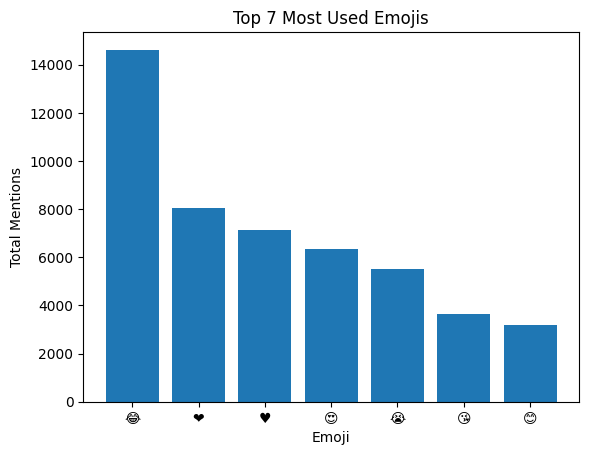

In [44]:
top_7 = df.sort_values(
    by="total_mentions", ascending=False
).head(7)

plt.figure()
plt.bar(top_7["emoji"], top_7["total_mentions"])
plt.title("Top 7 Most Used Emojis")
plt.xlabel("Emoji")
plt.ylabel("Total Mentions")
plt.show()

In [ ]:
#📊 4️⃣ Emoji Placement in Tweets (Beginning vs End)

#Interpretation:

#The visualization shows that emojis are more frequently placed at the end 
#of tweets rather than at the beginning. This suggests that emojis are often
#used to reinforce or emphasize the emotional tone of the text.

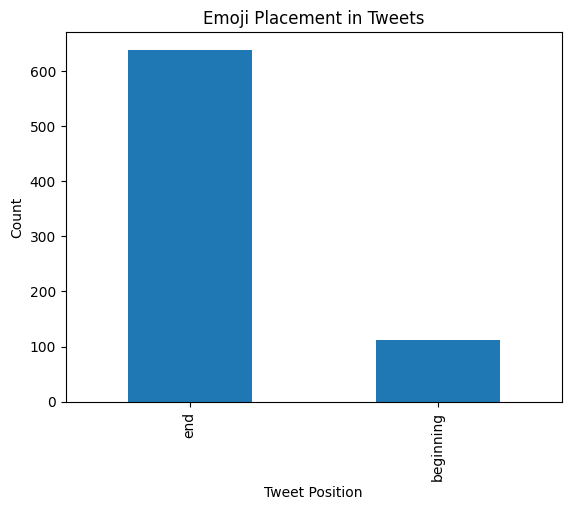

In [45]:
plt.figure()
df["emoji_location"].value_counts().plot(kind="bar")
plt.title("Emoji Placement in Tweets")
plt.xlabel("Tweet Position")
plt.ylabel("Count")
plt.show()

In [ ]:
#📊 5️⃣ Emoji Placement: Positive vs Negative (Grouped Bar Chart)

#Interpretation:

#Positive emojis are more commonly placed at the end of tweets,
#whereas negative emojis show a more balanced placement. This indicates 
#that positive emotions are often added as a concluding expression, while
#negative emotions may appear earlier to set context.

<Figure size 640x480 with 0 Axes>

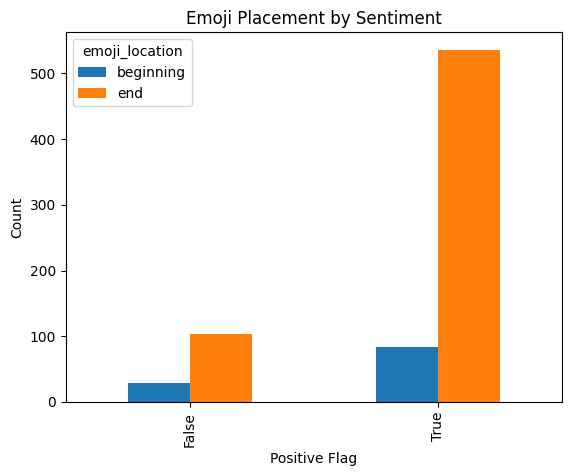

In [46]:
placement = (
    df.groupby(["positive_flag", "emoji_location"])
    .size()
    .unstack()
)

plt.figure()
placement.plot(kind="bar")
plt.title("Emoji Placement by Sentiment")
plt.xlabel("Positive Flag")
plt.ylabel("Count")
plt.show()

In [ ]:
#📊 6️⃣ Sentiment vs Popularity (Scatter Plot)

#Interpretation:

#The scatter plot reveals that highly popular emojis generally
#have positive sentiment scores, while emojis with negative sentiment
#tend to have lower usage. This suggests that positive emojis are more widely adopted by users.

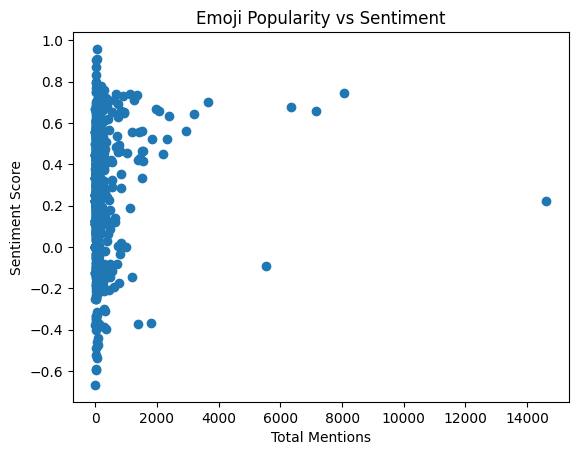

In [47]:
plt.figure()
plt.scatter(df["total_mentions"], df["sentiment"])
plt.title("Emoji Popularity vs Sentiment")
plt.xlabel("Total Mentions")
plt.ylabel("Sentiment Score")
plt.show()